# Attempt 1 at sentiment analysis

## Install NLTK

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [139]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/arjunrajpal/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/arjunrajpal/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/arjunrajpal/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/arjunrajpal/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/arjunrajpal/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]

True

## Other imports

In [140]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [141]:
# Loading the dataset
df = pd.read_csv('./data/Dataset_10k.csv')
df.head()

,title,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,is_weekend,is_holiday,source_type,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author
0,Kann künstliche Intelligenz Smalltalk ersetzen...,https://news.google.com/rss/articles/CBMiY2h0d...,2023-11-12,Blick,US,de,Can artificial intelligence replace small talk...,47,8,Sunday,...,True,False,News Outlet,https://www.blick.ch/schweiz/linguistik-profes...,www.blick.ch,www,2,ch,99,[]
1,Lidé se snadněji svěří chatbotům. Emocionální ...,https://news.google.com/rss/articles/CBMidmh0d...,2023-11-12,iDNES.cz,US,cs,People trust chatbots more easily. Emotional A...,72,13,Sunday,...,True,False,Other,https://www.idnes.cz/zpravy/domaci/ai-umela-in...,www.idnes.cz,www,3,cz,118,['Autor']
2,¿Cómo implementar la IA en el comercio online?...,https://news.google.com/rss/articles/CBMicmh0d...,2023-11-12,RRHH Digital,US,es,How to implement AI in online commerce? - Digi...,43,10,Sunday,...,True,False,News Outlet,https://www.rrhhdigital.com/secciones/tecnolog...,www.rrhhdigital.com,www,5,com,114,[]
3,"Kontrolle von KI: Vorsicht, KI! | ZEIT ONLINE ...",https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,ZEIT ONLINE English,US,de,"Controlling AI: Be careful, AI! | ZEIT ONLINE ...",56,12,Sunday,...,True,False,Other,https://www.zeit.de/zeit-wissen/2023/06/kuenst...,www.zeit.de,www,4,de,93,[]
4,Los consejos para ganar la lotería de la Intel...,https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,C5N,US,es,Tips to win the Artificial Intelligence lotter...,45,9,Sunday,...,True,False,Other,https://www.c5n.com/sociedad/los-consejos-gana...,www.c5n.com,www,2,com,93,[]


In [142]:
def clean_title(title):
    # Tokenize the title
    tokens = word_tokenize(title)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Join the filtered tokens back into a single string
    cleaned_title = ' '.join(filtered_tokens)
    return cleaned_title

In [143]:
sid = SentimentIntensityAnalyzer()
sentimentScores = pd.DataFrame([sid.polarity_scores(sentence) for sentence in df['title']])
df = pd.concat([df, sentimentScores], axis=1)

In [144]:
# Compute the maximum score among positive, negative, and neutral
max_score = df[['pos', 'neg', 'neu']].max(axis=1)

# Categorize sentiment based on the maximum score
df['sentiment'] = np.where(df['pos'] == max_score, 'positive', 
                   np.where(df['neg'] == max_score, 'negative', 'neutral'))

# Print the result
print(df['sentiment'])

0       neutral
1       neutral
2       neutral
3       neutral
4       neutral
         ...   
9995    neutral
9996    neutral
9997    neutral
9998    neutral
9999    neutral
Name: sentiment, Length: 10000, dtype: object


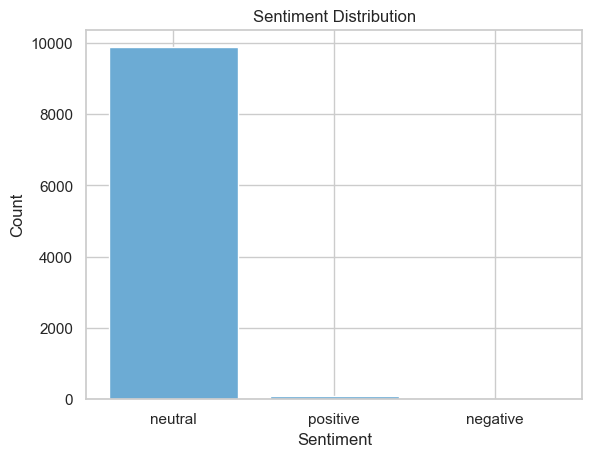

In [145]:
plt.bar(df['sentiment'].value_counts().index, df['sentiment'].value_counts(), color='#6CABD4')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [133]:
df[df['sentiment'] == 'positive']['title'].head(10)

371     2 Stocks That Could Benefit From Generative AI...
475              Improving safety in AI - FinTech Futures
601     Expo City Dubai Artificial Intelligence Film F...
663     Beyond Doomsday: Why AI Promises a Brighter Fu...
1094    University dedicated to AI – Intelligent CIO M...
1111    Why self-regulation is best for artificial int...
1178    Warren Buffett's Best 5 Artificial Intelligenc...
1228    Warren Buffett's Best 5 Artificial Intelligenc...
1247    Best AI Safety is ensuring good guys innovate ...
1337    The ethical implications of Artificial Intelli...
Name: title, dtype: object

In [134]:
df[df['sentiment'] == 'negative']['title'].head(10)

361     AI vendors create fear, uncertainty and doubt ...
1966    LoveGPT: The AI dating scam fooling Aussies - ...
2408    The evil twin sister: Gen AI's use in fraud - ...
2579    AI Platform Predicts Cancer Risk, Tumor Origin...
2969    AI technology helps Geisinger in fight against...
3457      Stupid Artificial Intelligence - hackernoon.com
3893    AI chatbot Chai encourages underage sex, suici...
5382    Tom Hanks Battles AI's Misleading Dental Ad De...
5533    The Big Threat to AI: Looming Disruptions - Th...
7093    The dangers of AI include mediocrity and licen...
Name: title, dtype: object

In [135]:
print(df.iloc[2579]['title'])
print(df.iloc[2579]['sentiment'])

AI Platform Predicts Cancer Risk, Tumor Origin With High Accuracy - Cancer Therapy Advisor
negative


## By Source Type

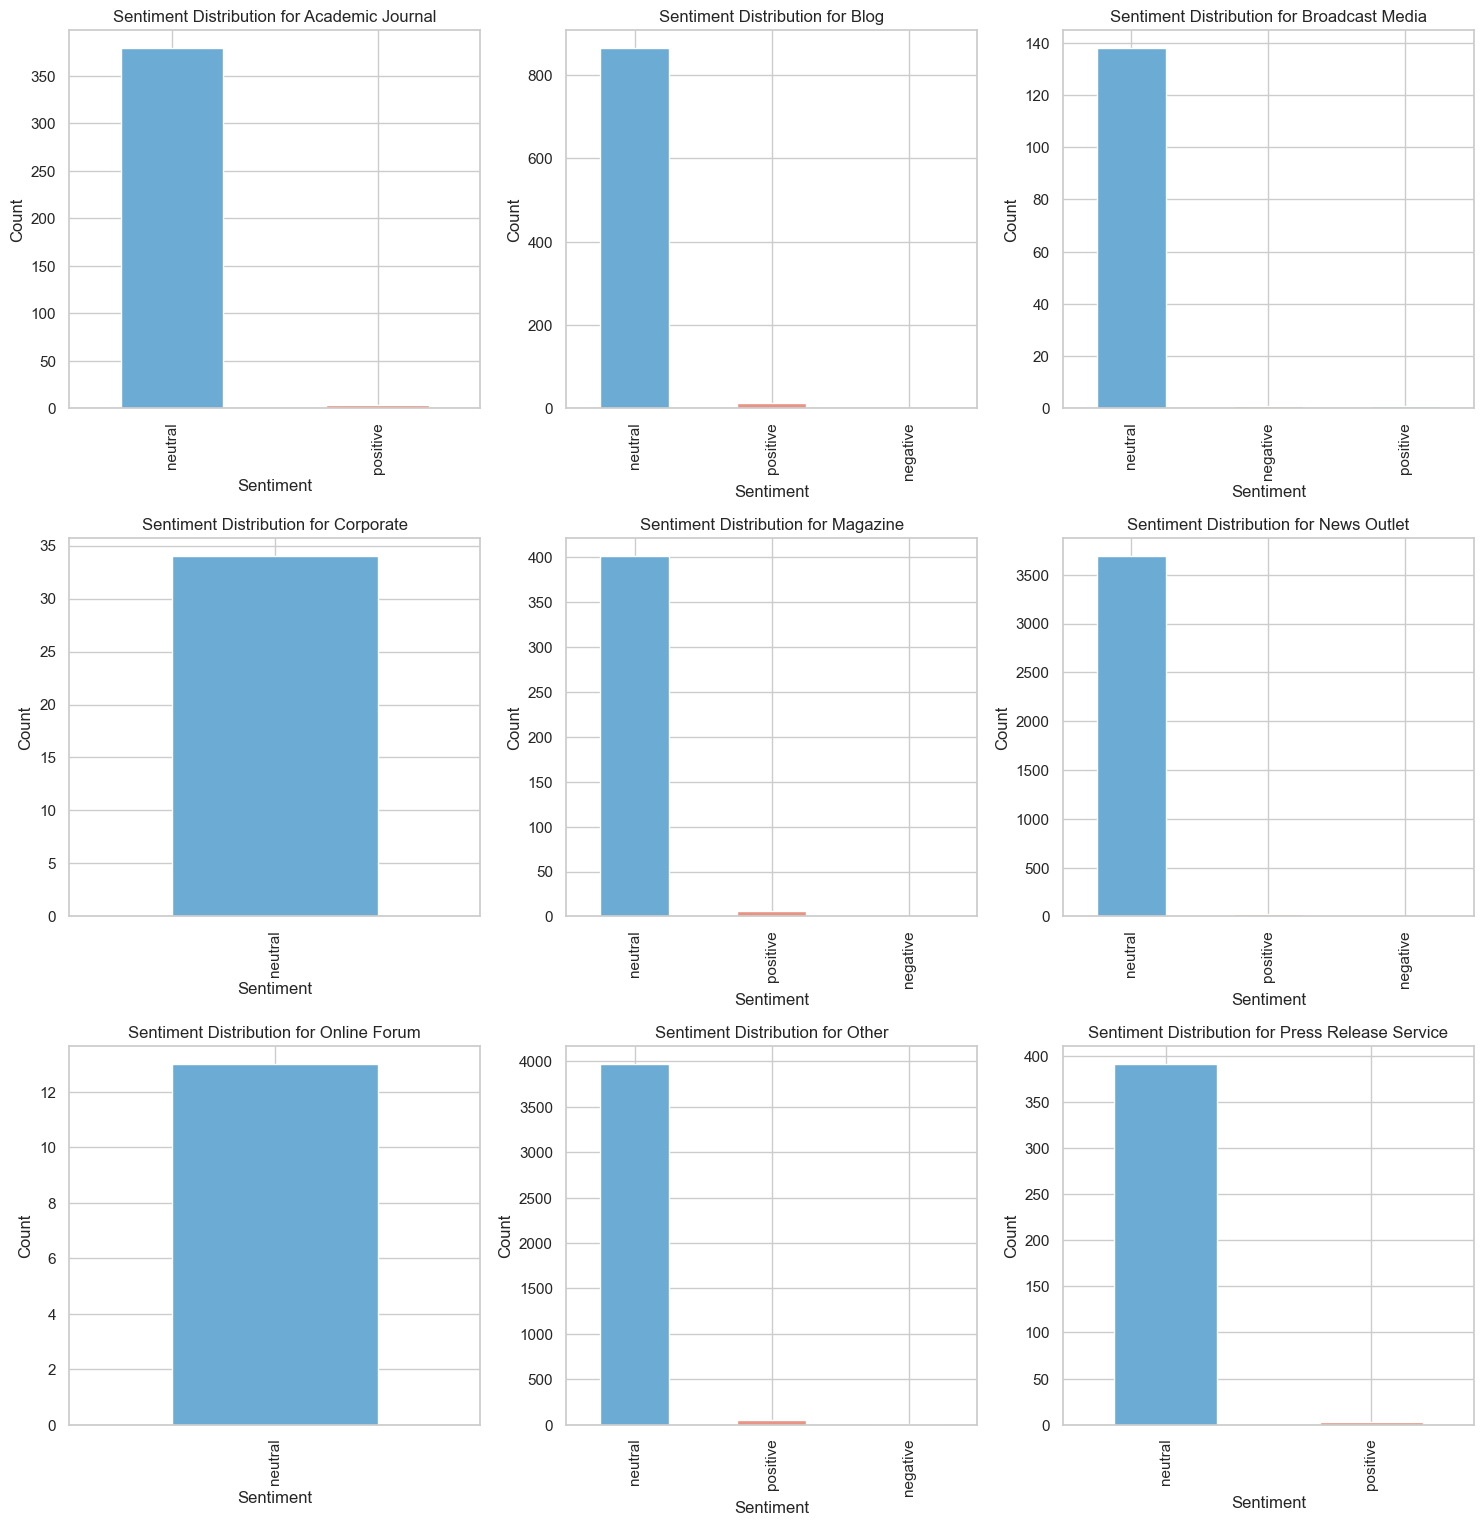

In [136]:
sentiment_counts_by_source = df.groupby('source_type')['sentiment'].value_counts()
n_rows = len(sentiment_counts_by_source.index.levels[0])
n_cols = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5*n_rows))
colors = ['#6CABD4', '#E99385', '#8CD3B1']

for i, (source_type, sentiment_counts) in enumerate(sentiment_counts_by_source.groupby(level=0)):
    ax = axes[i//n_cols, i%n_cols]  # Calculate row and column indices
    sentiment_counts.plot(kind='bar', ax=ax, color=colors)
    ax.set_xticklabels(sentiment_counts.index.get_level_values('sentiment')) 
    ax.set_title(f'Sentiment Distribution for {source_type}')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')

# Hide empty subplots
for i in range(n_rows * n_cols):
    if i >= len(sentiment_counts_by_source.index.levels[0]):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [137]:
sentiment_counts_by_source = df.groupby('source_type')['sentiment'].value_counts()

for source_type, sentiment_counts in sentiment_counts_by_source.groupby(level=0):
    print(f"Sentiment Distribution for {source_type}:")
    print(sentiment_counts)
    print()

Sentiment Distribution for Academic Journal:
source_type       sentiment
Academic Journal  neutral      379
                  positive       3
Name: count, dtype: int64

Sentiment Distribution for Blog:
source_type  sentiment
Blog         neutral      865
             positive      13
             negative       1
Name: count, dtype: int64

Sentiment Distribution for Broadcast Media:
source_type      sentiment
Broadcast Media  neutral      138
                 negative       1
                 positive       1
Name: count, dtype: int64

Sentiment Distribution for Corporate:
source_type  sentiment
Corporate    neutral      34
Name: count, dtype: int64

Sentiment Distribution for Magazine:
source_type  sentiment
Magazine     neutral      401
             positive       6
             negative       1
Name: count, dtype: int64

Sentiment Distribution for News Outlet:
source_type  sentiment
News Outlet  neutral      3690
             positive       27
             negative        5
Name: c